# 📘 Disciplina: Programação para Ciência de Dados

## 🧩 Matéria: Introdução ao Jupyter Notebook

### 👥 Integrant- Lucas Gabriel Guedes Limeira
- Maria Fernanda  Pedro  

---

Este notebook foi criado como parte da atividade introdutória da disciplina, com o objetivo de configurar e testar o ambiente Jupyter em contêiner Docker.

A seguir, serão adicionadas células de código e análises referentes ao tema proposto.


In [34]:
# Importações básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [46]:
data = pd.read_csv("estado-de-residencia-do-declarante.csv", delimiter=';', dtype=str)

data = data.apply(lambda x: x.str.replace(',', '.', regex=False))
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data_numerico = data.apply(pd.to_numeric, errors='coerce')

colunas_categoricas = ['Estado', 'Ano-Calendário']
colunas_numericas = [c for c in data_numerico.columns if c not in colunas_categoricas]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerico[colunas_numericas].fillna(0))

data_final = pd.concat([data[colunas_categoricas].reset_index(drop=True),
                        pd.DataFrame(data_scaled, columns=colunas_numericas)], axis=1)

print("=== Dataset final com escalonamento aplicado ===")
print(data_final.head())

selector = VarianceThreshold(threshold=0.01)
data_selected = selector.fit_transform(data_scaled)

colunas_mantidas = np.array(colunas_numericas)[selector.get_support()]
colunas_removidas = np.array(colunas_numericas)[~selector.get_support()]

print(f"Features mantidas: {len(colunas_mantidas)}")
print(colunas_mantidas)
print(f"Features removidas: {len(colunas_removidas)}")
print(colunas_removidas)

=== Dataset final com escalonamento aplicado ===
     Estado Ano-Calendário  Quantidade de Declarantes  \
0      Acre           2020                  -0.363484   
1   Alagoas           2020                  -0.242718   
2     Amapá           2020                  -0.361655   
3  Amazonas           2020                  -0.168211   
4     Bahia           2020                   0.458564   

   Rendimentos Tributáveis  Rendimentos sujeitos a Tributação Exclusiva  \
0                -0.306753                                    -0.240388   
1                -0.306543                                    -0.240281   
2                -0.306739                                    -0.240389   
3                -0.306420                                    -0.240225   
4                -0.305398                                    -0.239544   

   Rendimentos Isentos  Dedução Previdenciária Total  \
0            -0.251402                     -0.332365   
1            -0.251257                     -0

In [53]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_selected)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df = pd.concat([data[colunas_categoricas].reset_index(drop=True), pca_df], axis=1)

print("=== PCA - Primeiras linhas ===")
print(pca_df.head())

print("Variância explicada:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var*100:.2f}%")
print(f"Total explicado: {sum(pca.explained_variance_ratio_)*100:.2f}%")

\n=== PCA - Primeiras linhas ===
     Estado Ano-Calendário       PC1       PC2
0      Acre           2020 -0.421001 -1.430274
1   Alagoas           2020  0.351849 -1.183102
2     Amapá           2020 -0.302209 -1.392389
3  Amazonas           2020  0.595329 -1.105891
4     Bahia           2020  4.319583  0.086089
\nVariância explicada:
PC1: 51.87%
PC2: 40.14%
Total explicado: 92.01%


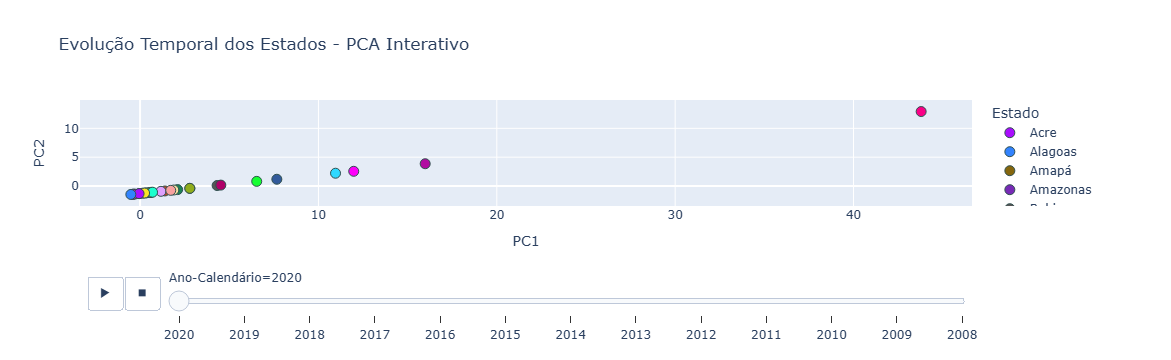

In [67]:
fig = px.scatter(
    pca_df,
    x="PC1", y="PC2",
    color="Estado",
    animation_frame="Ano-Calendário",
    title="Evolução Temporal dos Estados - PCA Interativo",
    color_discrete_sequence=px.colors.qualitative.Alphabet
)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.show()